In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyslim, tskit
import itertools
import scipy.special
import os, subprocess, sys
from Bio import Phylo
from io import StringIO
import msprime
import tqdm
from pathlib import Path

sys.path.append(str(Path(os.getcwd()).parent))

In [3]:
from src import extract_tree_stats, curve_inference

In [4]:
def effective_pop_size_pairwise(t1, t2, N, Ud, s):
    """
    t1 and t2 can be vectors
    """
    t1 = np.maximum(t1, -1)
    t2 = np.maximum(t2, -1)
    
    prob_coal = 1/N * np.exp(Ud/s * (1 - np.exp(-s * t1)) * (1 - np.exp(-s * t2)))
    
    # support negative times
    Ne = np.where((t1 >= 0) & (t2 >= 0), 1/prob_coal, np.nan)
    
    return Ne
    
 
    

# The first plot from Desai paper

In [127]:
target_path = "/rds/project/rds-8b3VcZwY7rY/projects/dated_selection/data/first_desai_20230506/"

In [135]:
all_n_lineages = curve_inference.read_all_n_lineages(target_path)

  0%|                                                                                                                                        | 0/75 [1:50:28<?, ?it/s]


In [158]:
max_generations = 40000

xs = np.concatenate([np.arange(0,500,10), np.arange(500, 2000, 100), np.arange(2000, 40000, 500)])


In [159]:
estimates = curve_inference.infer_Ne(all_n_lineages, xs)

In [160]:
N = 1e4
s = 1e-2
Ud = s * 2

t1 = np.arange(0, max_generations)
t2 = np.arange(0, max_generations)

theory_Ne = effective_pop_size_pairwise(t1, t2, N, Ud, s)



(0.0, 10000.0)

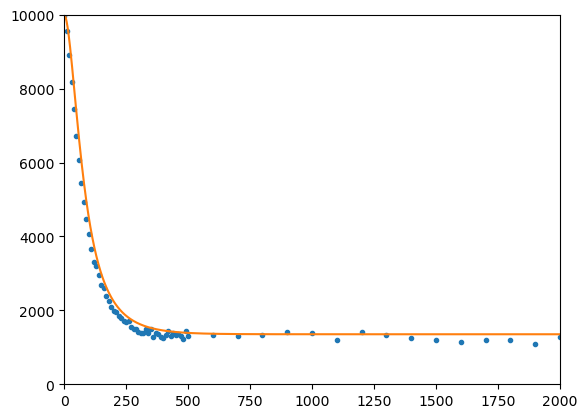

In [161]:
plt.plot(xs, estimates, '.')
plt.plot(t1, theory_Ne)
plt.xlim(0,2000)
plt.ylim(0, 10000)

# Two point sampling scheme

In [5]:
target_path = "/rds/project/rds-8b3VcZwY7rY/projects/dated_selection/data/two_times_100_20230506/"

In [6]:
all_n_lineages = curve_inference.read_all_n_lineages(target_path)

In [20]:
max_generations = 20000

xs = np.concatenate([
    np.arange(0, 500, 50), 
    np.arange(500, 2000, 100), 
    np.arange(2000, 10000, 500),
    np.arange(10000, 10500, 50), 
    np.arange(10500, 12000, 100), 
    np.arange(12000, max_generations, 1000),
])


In [21]:
estimates = curve_inference.infer_Ne(all_n_lineages, xs, n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   22.3s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   44.8s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  4.0min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  5.6min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  6.3min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  7.0min
[Parallel(n_jobs=5)]: Done  73 out of  73 | elapsed: 12.9min finished


In [160]:
N = 1e4
s = 1e-2
Ud = s * 2

t1 = np.arange(0, max_generations)
t2 = np.arange(0, max_generations)

theory_Ne = effective_pop_size_pairwise(t1, t2, N, Ud, s)



(0.0, 10000.0)

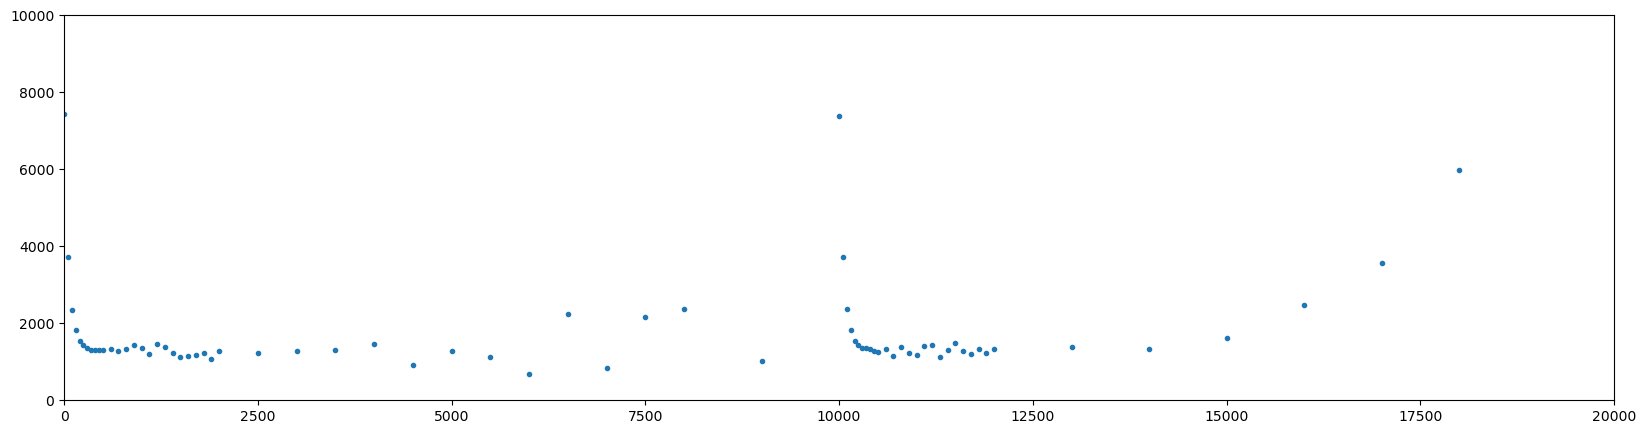

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(xs[:-1], estimates, '.')
#plt.plot(t1, theory_Ne)
plt.xlim(0,20000)
plt.ylim(0, 10000)

In [28]:
fine_estimates = curve_inference.infer_Ne(all_n_lineages, np.arange(10000,10050), n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 76 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:    6.7s remaining:   41.1s
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:    6.7s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    6.7s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:    7.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    7.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    7.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 31.4min finished


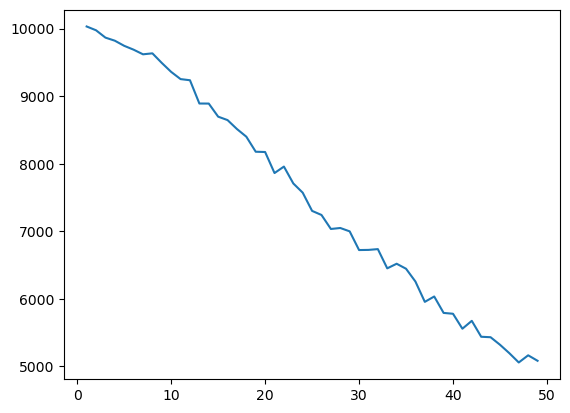

In [29]:
plt.plot(fine_estimates)